In [2]:
import pandas as pd
import lyricsgenius
import re
from textdistance import levenshtein
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

## Get the most popular song in USA and UK from wikipedia

In [6]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_popular_Christmas_singles_in_the_United_States')[2]

df.columns = ['Title', 'Artist', 'Year', 'Additional Information']

df = df.append(pd.read_html('https://en.wikipedia.org/wiki/List_of_Christmas_hit_singles_in_the_United_Kingdom')[1]
              , ignore_index= True)

df = df[['Title','Artist','Year']]

#### Clean songs title from '"' and (n) 

In [7]:
def cleaning(x):
    x = re.sub(r'"','',x)
    x = re.sub(r'\([1-9]+\)','',x)
    
    return x

df.Title = df.Title.apply( cleaning)

In [8]:
df = df.drop_duplicates()

## Get the lyrics from Genius API

In [14]:
f = open('genius_API_token.txt', 'r')  #the secret file conaining my token for genius API
token = f.read()
f.close()

api = lyricsgenius.Genius(token) #use your token https://genius.com/api-clients

df['lyrics'] = ''
for i , row in df.iterrows():
    try:
        song = api.search_song(row[0], row[1])
        if levenshtein (row[0], song.title) < len(row[0])/3:
            df.at[i,'lyrics'] = song.lyrics
        else:
            print( f'not corresponding song {song.title} for {row[0]}')
    except:
        continue

Searching for "A' Soalin'" by Peter, Paul & Mary...
Done.
Searching for "Adeste Fideles(O Come, All Ye Faithful)" by Associated Glee Clubs of America...
No results found for: 'Adeste Fideles(O Come, All Ye Faithful) Associated Glee Clubs of America'
Searching for "Adeste Fideles(O Come, All Ye Faithful)" by Bing Crosby...
Done.
Searching for "All Alone on Christmas" by Darlene Love...
Done.
Searching for "All I Really Want for Christmas" by Steven Curtis Chapman...
No results found for: 'All I Really Want for Christmas Steven Curtis Chapman'
Searching for "All I Want for Christmas Is a Real Good Tan" by Kenny Chesney...
Done.
Searching for "All I Want for Christmas Is My Two Front Teeth" by Spike Jones and his City Slickers...
Done.
Searching for "All I Want for Christmas Is You " by Carla Thomas...
Done.
Searching for "All I Want for Christmas Is You " by Vince Vance & The Valiants...
Done.
Searching for "All I Want for Christmas Is You " by Mariah Carey...
Done.
Searching for "All I 

Done.
Searching for "Christmas Dreaming (A Little Early This Year)" by Frank Sinatra...
Done.
not corresponding song Scarface Script for Christmas Dreaming (A Little Early This Year)
Searching for "Christmas Eve" by Kelly Clarkson...
Done.
Searching for "Christmas Eve in My Hometown" by Bobby Vinton...
Done.
not corresponding song Ulysses (Chap. 15 - Circe) for Christmas Eve in My Hometown
Searching for "Christmas Eve/Sarajevo 12/24" by Savatage...
Done.
Searching for "Christmas for Cowboys" by John Denver...
Done.
Searching for "Christmas in America" by Pat Benatar...
Done.
Searching for "Christmas in Dixie" by Alabama...
Done.
Searching for "Christmas in Hollis" by Run-D.M.C....
Done.
Searching for "Christmas in Killarney" by Dennis Day...
Done.
not corresponding song Angela’s Ashes for Christmas in Killarney
Searching for "Christmas in My Hometown" by Sonny James...
Done.
not corresponding song My Twisted World: The Story of Elliot Rodger (Part 6-2) for Christmas in My Hometown
Sear

Done.
Searching for "Christmas Wrapping" by The Waitresses...
Done.
Searching for "Christmastime " by Aimee Mann with Michael Penn...
No results found for: 'Christmastime  Aimee Mann with Michael Penn'
Searching for "Christmastime " by The Smashing Pumpkins...
Done.
Searching for "Cold December Night" by Michael Bublé...
Done.
Searching for "Colorado Christmas" by Nitty Gritty Dirt Band...
Done.
Searching for "Coming Home for Christmas" by Jim Brickman...
Done.
not corresponding song Coming Home for Christmas (feat. Richie McDonald) for Coming Home for Christmas
Searching for "Cool Yule" by Louis Armstrong with the Commanders...
Done.
Searching for "Coventry Carol" by Robert Shaw...
Done.
not corresponding song Folk-lore of Shakespeare - Chapter XI. Customs Connected with the Calendar for Coventry Carol
Searching for "Cozy Little Christmas" by Katy Perry...
Done.
Searching for "Daddy's Drinking Up Our Christmas" by Commander Cody...
Done.
not corresponding song Forrest Gump for Daddy's

No results found for: 'The Holly and the Ivy Petula Clark'
Searching for "Home for Christmas" by Daryl Hall & John Oates...
Done.
Searching for "Honky Tonk Christmas" by Alan Jackson...
Done.
Searching for "Hooray for Santa Claus" by Al Hirt...
Done.
not corresponding song Ulysses (Chap. 15 - Circe) for Hooray for Santa Claus
Searching for "How Lovely Is Christmas" by Bing Crosby...
Done.
Searching for "Hurry Home for Christmas" by Robert Goulet...
Done.
not corresponding song The Vampire, His Kith And Kin - Chapter 5 for Hurry Home for Christmas
Searching for "I Believe in Father Christmas" by Greg Lake...
Done.
Searching for "I Don't Intend to Spend Christmas Without You" by Margo Guryan...
Done.
Searching for "I Don't Wanna Spend One More Christmas Without You" by 'N Sync...
Done.
Searching for "I Farted on Santa's Lap (Now Christmas Is Gonna Stink for Me)" by The Little Stinkers...
Done.
Searching for "I Heard the Bells on Christmas Day" by Bing Crosby...
Done.
Searching for "I Onl

Done.
not corresponding song Ricochet! for Let It Snow! Let It Snow! Let It Snow!
Searching for "Let It Snow! Let It Snow! Let It Snow!" by Martina McBride...
Done.
Searching for "Let It Snow! Let It Snow! Let It Snow!" by George Strait...
Done.
Searching for "Let It Snow! Let It Snow! Let It Snow!" by Carly Simon...
Done.
not corresponding song Let It Snow for Let It Snow! Let It Snow! Let It Snow!
Searching for "Let It Snow! Let It Snow! Let It Snow!" by Mannheim Steamroller...
Done.
Searching for "Let It Snow! Let It Snow! Let It Snow!" by Rod Stewart...
Done.
Searching for "Let It Snow! Let It Snow! Let It Snow!" by India Arie & Joe Sample...
Done.
not corresponding song Let It Snow for Let It Snow! Let It Snow! Let It Snow!
Searching for "Let It Snow! Let It Snow! Let It Snow!" by Pentatonix...
Done.
Searching for "Let It Snow! Let It Snow! Let It Snow!" by Seal...
Done.
Searching for "Let's Light the Christmas Tree" by Ruby Wright...
Done.
not corresponding song Ulysses (Chap. 15

Done.
Searching for "Old Toy Trains" by Roger Miller...
Done.
Searching for "One Wish (for Christmas)" by Whitney Houston...
Done.
Searching for "Our Winter Love" by Bill Pursell...
Done.
not corresponding song Angela’s Ashes for Our Winter Love
Searching for "Paper Angels" by Jimmy Wayne...
Done.
Searching for "Parade of the Wooden Soldiers" by Vincent Lopez Orchestra...
No results found for: 'Parade of the Wooden Soldiers Vincent Lopez Orchestra'
Searching for "Peace on Earth/Little Drummer Boy" by David Bowie & Bing Crosby...
Done.
Searching for "Please Come Home for Christmas" by Charles Brown...
Done.
Searching for "Please, Daddy (Don't Get Drunk This Christmas)" by John Denver...
Done.
Searching for "Please Uncle Sam (Send Back My Man)" by The Charmels...
Done.
Searching for "Po' Folks' Christmas" by Bill Anderson and The Po' Boys...
No results found for: 'Po' Folks' Christmas Bill Anderson and The Po' Boys'
Searching for "Presents for Christmas" by Solomon Burke...
Done.
Searchi

Done.
Searching for "Tennessee Christmas" by Amy Grant...
Done.
Searching for "Thank God for Kids" by Oak Ridge Boys...
Done.
Searching for "Thank God It's Christmas" by Queen...
Done.
Searching for "Thanks for Christmas" by XTC...
Done.
not corresponding song The Devil Glitch for Thanks for Christmas
Searching for "That Holiday Feeling" by Steve and Eydie...
Done.
not corresponding song Dress to Kill for That Holiday Feeling
Searching for "That's Christmas to Me" by Pentatonix...
Done.
Searching for "That's What I Want for Christmas" by Nancy Wilson...
Done.
Searching for "There Is No Christmas Like a Home Christmas" by Perry Como...
Done.
Searching for "There Won't Be Any Snow (Christmas in the Jungle)" by Derrik Roberts...
No results found for: 'There Won't Be Any Snow (Christmas in the Jungle) Derrik Roberts'
Searching for "(There's No Place Like) Home for the Holidays" by Perry Como...
Done.
Searching for "(There's No Place Like) Home for the Holidays" by Garth Brooks...
Done.
Sea

No results found for: 'Bionic Santa Chris Hill'
Searching for "Blue Christmas" by Elvis Presley...
Done.
Searching for "Boots" by The Killers...
Done.
Searching for "Carol of the Bells" by John Williams...
Done.
Searching for "Christmas Alphabet" by Dickie Valentine...
Done.
Searching for "Christmas and You" by Dave King...
Done.
not corresponding song Arthur McBride And The Sergeant for Christmas and You
Searching for "Christmas Baby Please Come Home" by Michael Bublé...
Done.
Searching for "Christmas Countdown" by Frank Kelly...
Done.
not corresponding song Radio Hamburg TOP 825 for Christmas Countdown
Searching for "Christmas in Blobbyland" by Mr Blobby...
No results found for: 'Christmas in Blobbyland Mr Blobby'
Searching for "Christmas in Dreadland" by Judge Dread...
Done.
not corresponding song Of the Coming of John for Christmas in Dreadland
Searching for "Christmas in Hollis" by Run–D.M.C....
Done.
Searching for "Christmas in Smurfland" by Father Abraham & The Smurfs...
No resu

Done.
Searching for "Merry Xmas Everybody" by Slade...
Done.
Searching for "The Millennium Prayer" by Cliff Richard...
Done.
Searching for "Mistletoe" by Justin Bieber...
Done.
Searching for "Mistletoe and Wine" by Cliff Richard...
Done.
Searching for "Mr. Hankey, the Christmas Poo" by Mr. Hankey...
Done.
Searching for "Must Be Santa" by Tommy Steele...
Done.
not corresponding song Cryptonomicon for Must Be Santa
Searching for "Naughty Christmas (Goblin in the Office)" by Fat Les...
Done.
Searching for "New Year" by Sugababes...
Done.
Searching for "Never Mind the Presents" by The Barron Knights...
Done.
not corresponding song Eighteenth Brumaire of Louis Bonaparte (Chap. 3) for Never Mind the Presents
Searching for "Once Upon a Christmas Song" by Geraldine...
Done.
Searching for "Once Upon a Long Ago" by Paul McCartney...
Done.
not corresponding song Once Upon A Long Ago (Long Version) for Once Upon a Long Ago
Searching for "One I've Been Missing" by Little Mix...
Done.
Searching for 

In [34]:
#remove anomalous songs
def check_christmas_song(x):
    if type(x) != str: return False
    n_verse = len(x.split('\n') )
    n_world = len(x.split(' '))
    return (n_world >4) &(n_world < 400) & ( n_world/n_verse <20)


In [33]:
df[ df.lyrics.apply(check_christmas_song) ].to_csv('xmas-songs.csv',index=False)

In [3]:
df= pd.read_csv('xmas-songs.csv')

## Wordcloud

In [91]:
word_token = []
for i in df.lyrics:
    word_token = np.append(  word_token , i.split() )

stop_words = stopwords.words('english')

filtered_sentence = [w.lower() for w in word_token if not w.lower() in stop_words]

text = ' '.join(word_token  )#filtered_sentence)

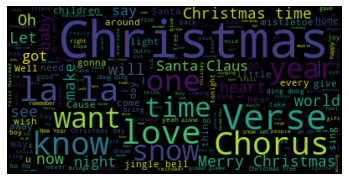

In [92]:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()